In [1]:
from kan import *
from kan.spline import *
import torch
import matplotlib.pyplot as plt

# set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


Exponential

In [ ]:
# initialize KAN with grid=3
model_exp = KAN(width=[1,4,1], grid=3, k=3, seed=1, device=device, base_fun= 'identity')  # 2 input, 10 nodes in 1 hidden layer, 1 output
#   ? what does k do --> spline order
#   ? what should grid be
#   base function general equation: phi(x) = sb_scale * b(x) + sp_scale * spline(x)

# create dataset
f = lambda x: torch.exp(x[:, [0]])#+torch.exp(x[:,[1]])


dataset = create_dataset(f, n_var=1, ranges=[-1.0, 1.0], train_num = 1000, device=device)

checkpoint directory created: ./model
saving model version 0.0


In [12]:
#   last time we said to change how they defined spline(x), coefficient 1 x spline 1 + coefficient 2 x spline 2 + ..., to get rid of the coefficients
#   I'm not sure if you can manually change the coefficients in this model


In [4]:
# fit and refine
model_exp.fit(dataset, opt="LBFGS", steps=20)   # LBFGS ---- second order optimizer
model_exp = model_exp.refine(10)    # grid=10
model_exp.fit(dataset, opt="LBFGS", steps=20)

description:   0%|                                                           | 0/20 [00:00<?, ?it/s]

| train_loss: 1.37e-04 | test_loss: 1.35e-04 | reg: 1.19e+01 | : 100%|█| 20/20 [00:01<00:00, 13.33it


saving model version 0.1
saving model version 0.2


| train_loss: 5.80e-05 | test_loss: 5.73e-05 | reg: 1.12e+01 | : 100%|█| 20/20 [00:01<00:00, 11.38it

saving model version 0.3


{'train_loss': [array(0.0024171, dtype=float32),
  array(0.00097074, dtype=float32),
  array(0.0005029, dtype=float32),
  array(0.00031056, dtype=float32),
  array(0.00022379, dtype=float32),
  array(0.00013692, dtype=float32),
  array(0.00010543, dtype=float32),
  array(8.5927946e-05, dtype=float32),
  array(7.783505e-05, dtype=float32),
  array(7.3874115e-05, dtype=float32),
  array(6.830277e-05, dtype=float32),
  array(6.6049404e-05, dtype=float32),
  array(6.389726e-05, dtype=float32),
  array(6.315706e-05, dtype=float32),
  array(6.157224e-05, dtype=float32),
  array(5.9853035e-05, dtype=float32),
  array(5.9206897e-05, dtype=float32),
  array(5.8727426e-05, dtype=float32),
  array(5.824241e-05, dtype=float32),
  array(5.795809e-05, dtype=float32)],
 'test_loss': [array(0.00233978, dtype=float32),
  array(0.00095824, dtype=float32),
  array(0.00050817, dtype=float32),
  array(0.00031105, dtype=float32),
  array(0.00022184, dtype=float32),
  array(0.0001323, dtype=float32),
  array

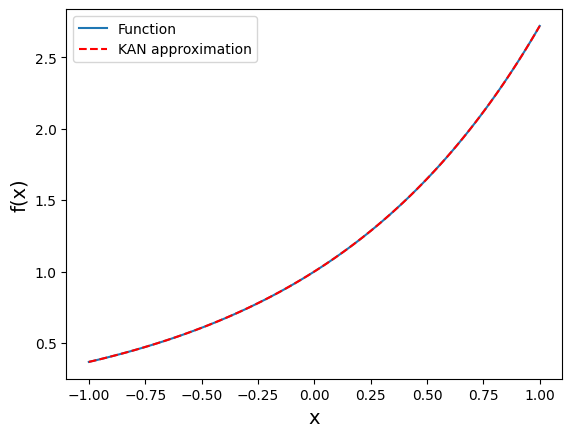

In [5]:
# plot approximation
x_eval = torch.linspace(-1, 1, 100).unsqueeze(1).to(device)

with torch.no_grad():   # no gradient calculation, faster + saves memory
    y_true = torch.exp(x_eval)
    y_pred =  model_exp(x_eval)

# if device == 'cuda' / GPU 
#x_eval = x_eval.cpu().numpy()  
#y_true = y_true.cpu().numpy()
#y_pred = y_pred.cpu().numpy()

plt.plot(x_eval, y_true,label = 'Function')
plt.plot(x_eval, y_pred, 'r--', label = 'KAN approximation')
plt.xlabel('x', fontsize = 14)
plt.ylabel('f(x)', fontsize = 14)
plt.legend()

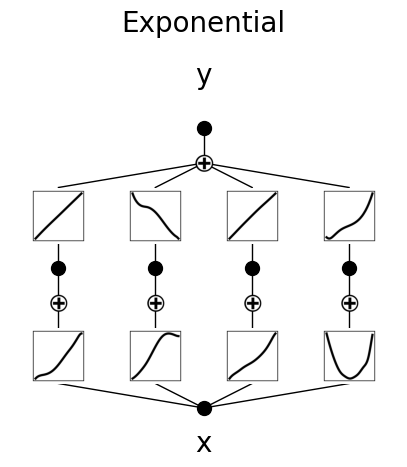

In [6]:
# plot KAN model
model_exp.plot(beta=100, in_vars=['x'], out_vars=['y'], title = 'Exponential')

Extracting Activation Function Coeffs and Spline Functions

ModuleList(
  (0-1): 2 x KANLayer(
    (base_fun): Identity()
  )
)
--------  --------
tensor([[[ 0.4520,  0.5514,  0.5217,  0.4578,  0.4113,  0.4008,  0.4338,
           0.4909,  0.5488,  0.5922,  0.6743,  0.7588,  0.5347],
         [-0.0869, -0.1060, -0.0977, -0.0676, -0.0281,  0.0497,  0.1370,
           0.2023,  0.2214,  0.1804,  0.1061,  0.0300,  0.0102],
         [ 0.3142,  0.4106,  0.3834,  0.3368,  0.3100,  0.2568,  0.2000,
           0.1690,  0.1562,  0.1682,  0.2415,  0.3271,  0.2415],
         [ 0.0396, -0.0945, -0.2109, -0.3036, -0.3738, -0.4035, -0.4291,
          -0.4203, -0.4048, -0.3582, -0.3374, -0.1380, -0.0164]]])
--------  --------
4
--------  --------
tensor([[[ 0.0000e+00],
         [ 0.0000e+00],
         [ 0.0000e+00],
         [ 0.0000e+00]],

        [[ 0.0000e+00],
         [ 0.0000e+00],
         [ 0.0000e+00],
         [ 0.0000e+00]],

        [[ 0.0000e+00],
         [ 0.0000e+00],
         [ 0.0000e+00],
         [ 0.0000e+00]],

        [[ 0.0000e+00],
 

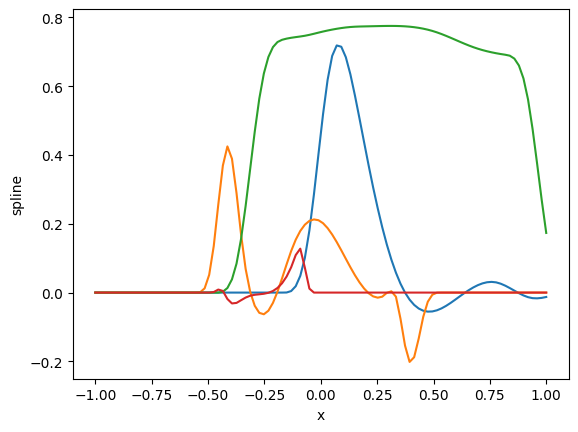

In [7]:
print(model_exp.act_fun)
print("--------  --------")
print(model_exp.act_fun[0].coef.data)   # coefficients of first activation function
print("--------  --------")
print(model_exp.act_fun[1].in_dim)     # output dimension of second activation function

print("--------  --------")
x = torch.linspace(-1, 1, 100).unsqueeze(1)
grid = model_exp.act_fun[1].grid
co = model_exp.act_fun[1].coef
k = model_exp.act_fun[1].k
 
spline_fuc = coef2curve(x_eval=x, grid=grid, coef=co, k=k)

print(spline_fuc)

x_np = x.squeeze().detach().numpy()
spline_np = spline_fuc.squeeze().detach().numpy()

plt.plot(x_np, spline_np)
plt.xlabel('x')
plt.ylabel('spline')

print("--------  --------")
i=1




In [ ]:
#   wrong code, will keep searching
#W_data = model_exp.nets[i].linear[-1].weight.data
#b_data = model_exp.nets[i].linear[-1].bias.data


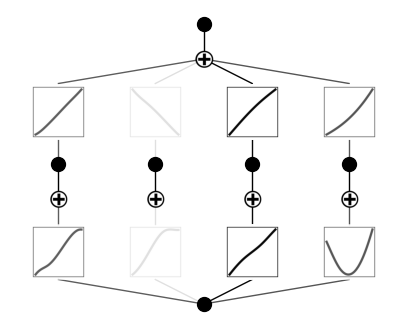

In [53]:
#prep for pruning
model_exp(dataset['train_input'])   #forward pass, so can then draw an activation-based plot
model_exp.plot()

saving model version 0.5


/Users/bessie/Library/Python/3.12/lib/python/site-packages/sympy/core/sympify.py:475: UserWarning: Converting a tensor with requires_grad=True to a scalar may lead to unexpected behavior.
Consider using tensor.detach() first. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/autograd/generated/python_variable_methods.cpp:837.)
  return sympify(float(a))


([0], [x_1])

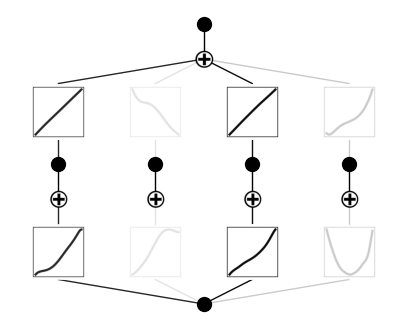

In [30]:
model_exp = model_exp.prune()   # prune nodes and edges together
model_exp.plot()
model_exp.symbolic_formula()

Gaussian

In [36]:
# initialize KAN with grid=3
model_gaus = KAN(width=[1,10,1], grid=3, k=3, seed=1, device=device)  # 1 input, 10 nodes in 1 hidden layer, 1 output

# create dataset
mu = 0.0
sigma = 1.0

f = lambda x: torch.exp(-0.5 * ((x[:, [0]] - mu) / sigma)**2)

dataset = create_dataset(f, n_var=1, ranges=[-1.0, 1.0], train_num = 100, device=device)

checkpoint directory created: ./model
saving model version 0.0


In [37]:
# fit and refine
model_gaus.fit(dataset, opt="LBFGS", steps=20)   # LBFGS ---- second order optimizer
model_gaus = model_gaus.refine(10)    # grid=10
model_gaus.fit(dataset, opt="LBFGS", steps=20)

| train_loss: 4.41e-05 | test_loss: 4.63e-05 | reg: 1.23e+01 | : 100%|█| 20/20 [00:00<00:00, 30.74it


saving model version 0.1
saving model version 0.2


| train_loss: 4.40e-06 | test_loss: 5.02e-06 | reg: 1.23e+01 | : 100%|█| 20/20 [00:00<00:00, 42.85it

saving model version 0.3


{'train_loss': [array(6.7711655e-05, dtype=float32),
  array(2.3174738e-05, dtype=float32),
  array(1.05822e-05, dtype=float32),
  array(8.158888e-06, dtype=float32),
  array(7.262048e-06, dtype=float32),
  array(7.0645056e-06, dtype=float32),
  array(7.0645056e-06, dtype=float32),
  array(7.0645056e-06, dtype=float32),
  array(7.0645056e-06, dtype=float32),
  array(7.0645056e-06, dtype=float32),
  array(6.593632e-06, dtype=float32),
  array(5.8207956e-06, dtype=float32),
  array(5.2912915e-06, dtype=float32),
  array(5.287483e-06, dtype=float32),
  array(5.287483e-06, dtype=float32),
  array(4.797904e-06, dtype=float32),
  array(4.416298e-06, dtype=float32),
  array(4.4035532e-06, dtype=float32),
  array(4.4035532e-06, dtype=float32),
  array(4.4035532e-06, dtype=float32)],
 'test_loss': [array(7.573165e-05, dtype=float32),
  array(2.7902048e-05, dtype=float32),
  array(1.2792472e-05, dtype=float32),
  array(9.362863e-06, dtype=float32),
  array(8.5087695e-06, dtype=float32),
  array(

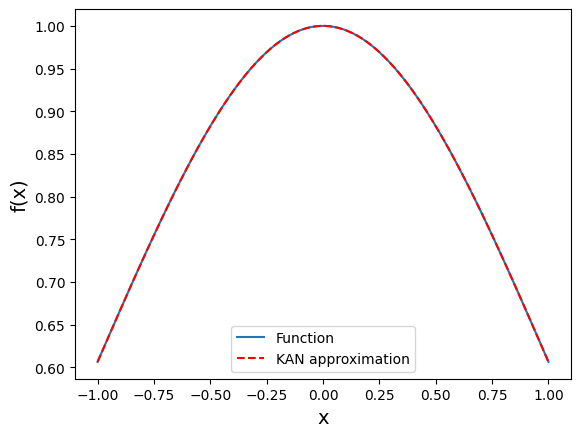

In [38]:
# plot approximation
x_eval = torch.linspace(-1, 1, 100).unsqueeze(1).to(device)

with torch.no_grad():   # no gradient calculation, faster + saves memory
    y_true = torch.exp(-0.5 * ((x_eval - mu) / sigma)**2)
    y_pred =  model_gaus(x_eval)

# if device == 'cuda' / GPU 
#x_eval = x_eval.cpu().numpy()  
#y_true = y_true.cpu().numpy()
#y_pred = y_pred.cpu().numpy()

plt.plot(x_eval, y_true,label = 'Function')
plt.plot(x_eval, y_pred, 'r--', label = 'KAN approximation')
plt.xlabel('x', fontsize = 14)
plt.ylabel('f(x)', fontsize = 14)
plt.legend()

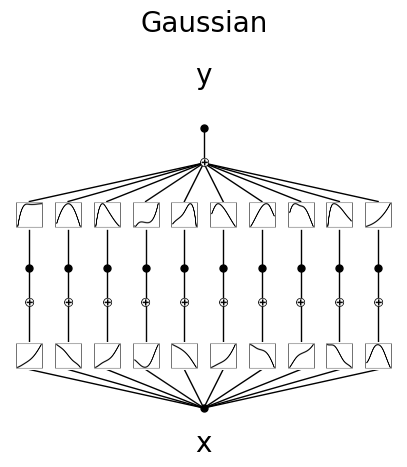

In [39]:
# plot KAN model
model_gaus.plot(beta=100, in_vars=['x'], out_vars=['y'], title = 'Gaussian')

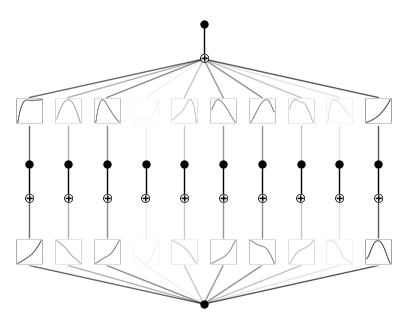

In [41]:
#prep for pruning
model_gaus(dataset['train_input'])   #forward pass, so can then draw an activation-based plot
model_gaus.plot()

saving model version 0.4


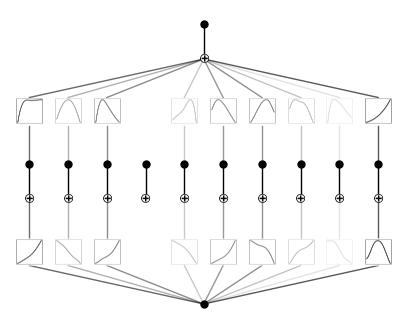

In [42]:
model_gaus = model_gaus.prune()   # prune nodes and edges together
model_gaus.plot()